In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### Reading and Understanding The Data

In [269]:
data=pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [270]:
data.shape

(9240, 37)

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [272]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [273]:
### Checking for duplicates in Prospect ID and Lead Number Column
print("The Number of rows present in data frame is:",data.shape[0])
print("The Number of unique values of Prospect ID column is: ",len(set(data['Prospect ID'])))
print("The Number of unique values of Prospect ID column is: ",len(set(data['Lead Number'])))

The Number of rows present in data frame is: 9240
The Number of unique values of Prospect ID column is:  9240
The Number of unique values of Prospect ID column is:  9240


* Thus we can say that, there are no duplicate IDs in both Prospect and Lead Number columns and are unique and is same as the number of rows of the data frame.

## Exploratory Data Analysis

### Data Cleaning:

#### Checking for percentage of null values in all columns:

In [274]:
null_per=round(data.isnull().sum()*100/len(data),2)
null_per

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [275]:
## Removing the columns with more than or equal to 45 % Null values in them
data=data[null_per[null_per.values<45].index]

In [276]:
round(data.isnull().sum()*100/len(data),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Deleting Unnecessary Columns:

* Since, Prospect ID and Lead ID are acting like an index and no duplicates are found, it is safe to delete those columns.

In [277]:
data=data.iloc[:,2:]

#### Imputation of Categorical Variables:

In [278]:
obj_cols=round(data[data.select_dtypes(include='object').columns].isnull().sum()/len(data)*100,2)
obj_cols

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Tags      

In [279]:
## Selecting the object data type columns whose missing values percentage >= 10%
data[obj_cols[obj_cols>=10].index].describe()

,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,City
count,6779,7802,7033,6550,6531,5887,6531,7820
unique,38,19,10,6,3,26,6,7
top,India,Select,Select,Unemployed,Better Career Prospects,Will revert after reading the email,Select,Mumbai
freq,6492,1942,5043,5600,6528,2072,4146,3222


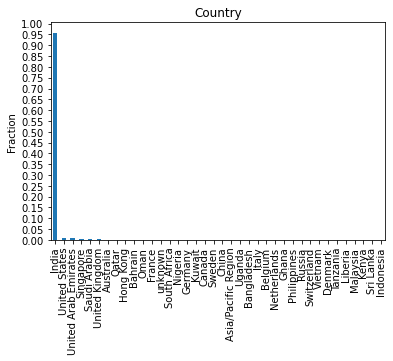

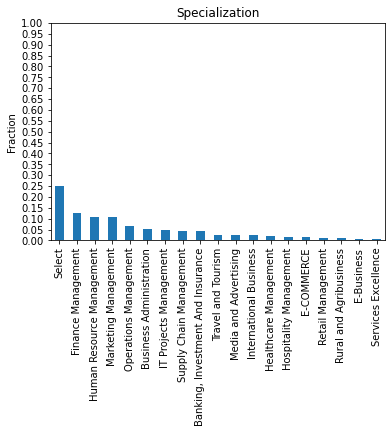

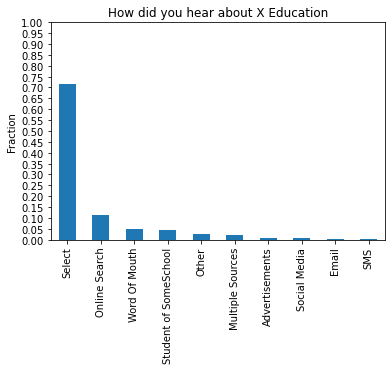

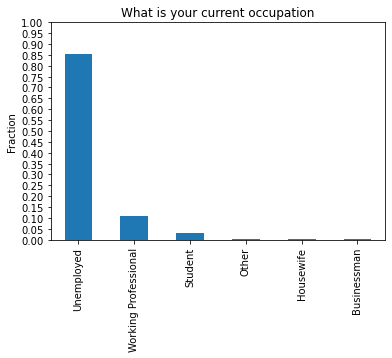

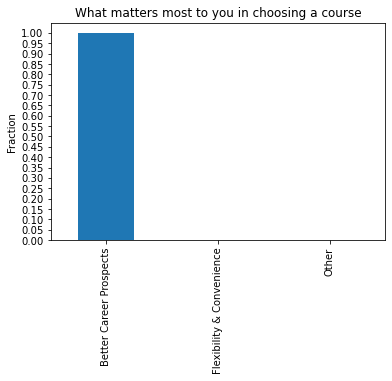

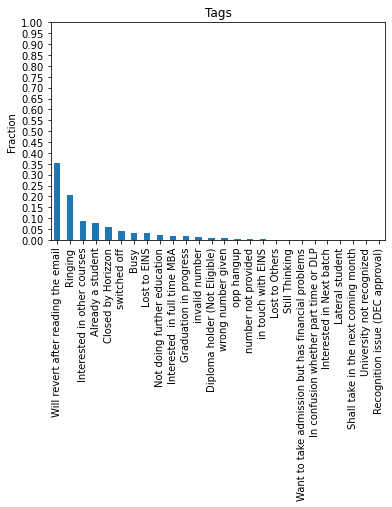

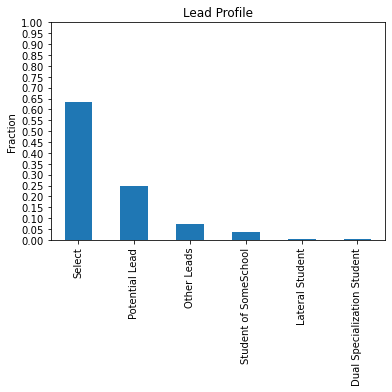

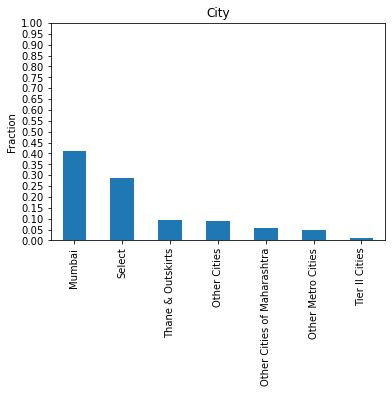

In [280]:
## Plotting object variables whose missing values > = 10%
obj_cols10=obj_cols[obj_cols>=10].index
for i in obj_cols10:
    data[i].value_counts(normalize=True).plot.bar()
    listof_xticks=np.arange(0,1.05,0.05)
    plt.yticks(listof_xticks)
    plt.title(label=i)
    plt.ylabel("Fraction")
    plt.show()

-  From the above plots, we could see that in 'Specialisation' column, around 25 % of leads have specialisation as 'Select' which means their specialisation is not specified by them. It is better to replace 'Select' in this column as 'Not Specified'. <br>
-  Similarly in the column 'How Did you Hear about X Education' it is better to replace 'Select' values with 'Not Specified'. <br>
-  In the 'Lead Profile' column it is better to replace the 'Select' category as 'Unknown Lead'.<br>
-  In the 'City' column, it is better to merge 'Select' cell values by replacing them as 'Other Cities'.

In [281]:
data['Specialization']=data['Specialization'].replace('Select','Not Specified')
data['How did you hear about X Education']=data['How did you hear about X Education'].replace('Select','Not Specified')
data['Lead Profile']=data['Lead Profile'].replace('Select','Unknown Lead')
data['City']=data['City'].replace('Select','Other Cities')

-  The above categorical columns who have missing value >=10 % but less than <=50 % could be replaced by the mode value of the corresponding columns.

In [282]:
data[obj_cols10].mode()

,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,City
0,India,Not Specified,Not Specified,Unemployed,Better Career Prospects,Will revert after reading the email,Unknown Lead,Mumbai


In [283]:
data['Country']=data['Country'].replace(np.nan,'India')
data['Specialization']=data['Specialization'].replace(np.nan,'Not Specified')
data['How did you hear about X Education']=data['How did you hear about X Education'].replace(np.nan,'Not Specified')
data['What is your current occupation']=data['What is your current occupation'].replace(np.nan,'Unemployed')
data['What matters most to you in choosing a course']=data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')
data['Tags']=data['Tags'].replace(np.nan,'Will revert after reading the email')
data['Lead Profile']=data['Lead Profile'].replace(np.nan,'Unknown Lead')
data['City']=data['City'].replace(np.nan,'Mumbai')

In [284]:
## Checking for percentage of null values again
print(round(data.isnull().sum()*100/len(data),2))
print("The Shape of data frame is:",data.shape)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

Only a few columns have <2% of missing values, thus removing the correpsonding rows wont affect our data analysis.

In [285]:
data.dropna(inplace=True)
print("The Null values percentage in the corresponding columns are as folows:","\n",round(data.isnull().sum()*100/len(data),2))
print("The shape of dataframe after cleaning the data is:",data.shape)

The Null values percentage in the corresponding columns are as folows: 
 Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums        

#### Checking for outliers in the data:

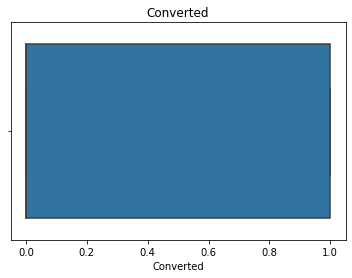

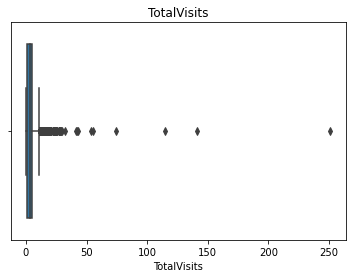

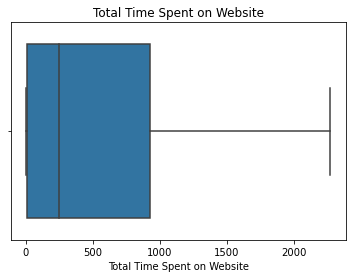

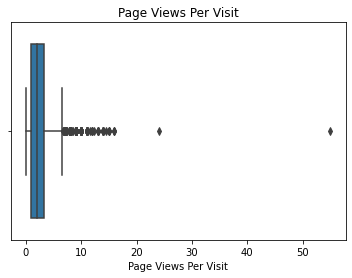

In [286]:
num_cols=data.select_dtypes(exclude='object').columns
for i in num_cols:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

From above plots we can see that 'Total Visits' and 'Page Views Per Visit' columns have outliers.

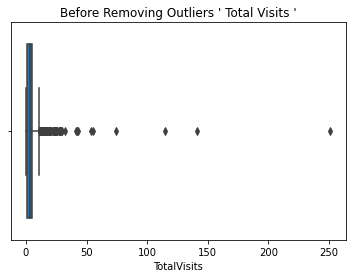

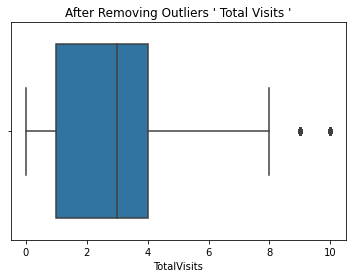

count    8721.000000
mean        2.916294
std         2.468306
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: TotalVisits, dtype: float64
count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64


In [287]:
sns.boxplot(data['TotalVisits'])
plt.title('Before Removing Outliers \' Total Visits \'')
plt.show()
sns.boxplot(data['TotalVisits'][data['TotalVisits']<=data['TotalVisits'].quantile(q=0.95)])
plt.title("After Removing Outliers \' Total Visits \'")
plt.show()
print(data['TotalVisits'][data['TotalVisits']<=data['TotalVisits'].quantile(q=0.95)].describe())
print(data['TotalVisits'].describe())

In [289]:
data=data[data['TotalVisits']<=data['TotalVisits'].quantile(q=0.95)]
data.shape

(8721, 30)

* After removing outliers in 'Total Visits' Column, we could see the outliers in 'Page Views Per Visit' column as follows:

<AxesSubplot:xlabel='Page Views Per Visit'>

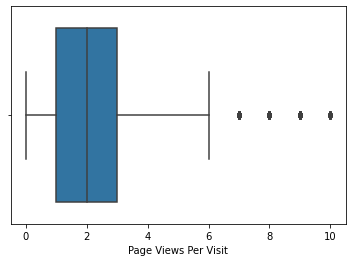

In [292]:
sns.boxplot(data['Page Views Per Visit'])

In [293]:
## Checking for statistics in 'Page Views Per Visit' column after using 95 % quantile
print(data['Page Views Per Visit'].describe())
print(data['Page Views Per Visit'][data['Page Views Per Visit']<=data['Page Views Per Visit'].quantile(q=0.95)].describe())

count    8721.000000
mean        2.255668
std         1.922397
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64
count    8445.000000
mean        2.071957
std         1.649040
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Page Views Per Visit, dtype: float64


* There isn't significant difference in the mean, median values of 'Page Views Per Visit' column after removal of outliers,<br>
thus we can keep them as it is.

In [298]:
# Percentage (%) of value counts column wise:
for i in data.columns:
    print(round(data[i].value_counts()/len(data[i])*100,2))

Landing Page Submission    53.07
API                        39.97
Lead Add Form               6.62
Lead Import                 0.34
Name: Lead Origin, dtype: float64
Google               31.84
Direct Traffic       27.89
Olark Chat           19.97
Organic Search       11.86
Reference             5.06
Welingak Website      1.47
Referral Sites        1.26
Facebook              0.36
bing                  0.07
google                0.06
Click2call            0.03
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
Press_Release         0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64
No     92.2
Yes     7.8
Name: Do Not Email, dtype: float64
No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64
0    62.5
1    37.5
Name: Converted, dtype: float64
0.0     24.78
2.0     19.25
3.0     14.98
4.0     12.84
5.0   

* From the above value counts, we can see that in 'Lead Source' column there are 'google' and 'Google' values which means same, so we can merge them.
* The low percentage categories in the 'Lead Source' column can be merged to a category called 'Other Lead Sources' i.e.,
the following categories:
"Welingak Website, Referral Sites, Facebook, bing, Click2call, Social Media, Live Chat, youtubechannel, Press_Release, testone, Pay per Click Ads, welearnblog_Home, WeLearn, blog, NC_EDM" can be merged in 'Other Lead Sources'.

In [304]:
## Replacing minor categories in 'Lead Source' column in to 'Other Lead Sources'
data['Lead Source']=data['Lead Source'].replace('google','Google')
data['Lead Source']=data['Lead Source'].replace(['Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'Click2call', 'Social Media', 'Live Chat', 'youtubechannel', 'Press_Release', 'testone', 'Pay per Click Ads', 'welearnblog_Home', 'WeLearn','blog', 'NC_EDM'],'Other Lead Sources')
data['Lead Source'].value_counts()

Google                2782
Direct Traffic        2432
Olark Chat            1742
Organic Search        1034
Reference              441
Other Lead Sources     290
Name: Lead Source, dtype: int64

In [308]:
## Replacing and Merging the low value counts in the 'Last Activity' column to 'Other Last Activity'
data['Last Activity']=data['Last Activity'].replace(['Email Bounced','Email Link Clicked','Form Submitted on Website',
                                                     'Unreachable','Unsubscribed','Had a Phone Conversation',
                                                     'View in browser link Clicked','Approached upfront','Email Received',
                                                     'Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Other Last Activity')
data['Last Activity'].value_counts()

Email Opened               3310
SMS Sent                   2635
Olark Chat Conversation     953
Other Last Activity         861
Page Visited on Website     535
Converted to Lead           427
Name: Last Activity, dtype: int64

In [309]:
## Replacing and merging the low value counts in the 'Tags' column to 'Other Tags'
data['Tags']=data['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup',
                                   'number not provided','in touch with EINS','Lost to Others','Still Thinking',
                                   'In confusion whether part time or DLP','Interested in Next batch',
                                   'Want to take admission but has financial problems','Lateral student',
                                   'Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Other Tags')
data['Tags'].value_counts()

Will revert after reading the email    5155
Ringing                                1132
Interested in other courses             492
Already a student                       453
Other Tags                              291
Closed by Horizzon                      271
switched off                            233
Busy                                    175
Lost to EINS                            164
Not doing further education             136
Interested  in full time MBA            113
Graduation in progress                  106
Name: Tags, dtype: int64

In [310]:
## Replacing low value count countries in 'Country' column to 'Other Countries'
data['Country']=data['Country'].replace(['United States','United Arab Emirates','Singapore','Saudi Arabia','United Kingdom',
                                         'Australia','Qatar','Bahrain','Hong Kong','Oman','France','Kuwait','unknown','Canada',
                                         'Nigeria','Germany','South Africa','Bangladesh','Asia/Pacific Region','Philippines',
                                         'Italy','Uganda','Sweden','Netherlands','China','Belgium','Ghana','Russia','Kenya',
                                         'Tanzania','Sri Lanka','Malaysia','Liberia','Switzerland','Denmark','Vietnam','Indonesia'],
                                        'Othe Countries')
data['Country'].value_counts()

India             8445
Othe Countries     276
Name: Country, dtype: int64

In [312]:
## Merging different management specializations in to a single category called 'Management'
data['Specialization']=data['Specialization'].replace(['Finance Management','Marketing Management','Human Resource Management',
                                                       'Operations Management','IT Projects Management',
                                                       'Supply Chain Management','Healthcare Management','Hospitality Management',
                                                       'Retail Management'],'Management')
data['Specialization'].value_counts()

Management                           4009
Not Specified                        3224
Business Administration               380
Banking, Investment And Insurance     313
Media and Advertising                 187
Travel and Tourism                    180
International Business                169
E-COMMERCE                            104
Rural and Agribusiness                 64
E-Business                             55
Services Excellence                    36
Name: Specialization, dtype: int64

In [313]:
## Replacing low value count categoires in 'Last Notable Activity' in to a single category called 'Least Notable Activities'
data['Last Notable Activity']=data['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                                                       'Had a Phone Conversation','Email Marked Spam',
                                                                       'Approached upfront','Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Form Submitted on Website','Email Received'],
                                                                    'Least Notable Activity')
data['Last Notable Activity'].value_counts()

Modified                   3179
Email Opened               2717
SMS Sent                   2086
Page Visited on Website     246
Olark Chat Conversation     175
Email Link Clicked          165
Least Notable Activity      153
Name: Last Notable Activity, dtype: int64

#### Dropping columns which are not balanced (i.e.,  containing one category value count frequency more than 95% out of two categories present):

Following are the columns which seems to be imbalanced:
-  Do Not Email
-  Do Not Call
-  Search
-  Magazine
-  Newspaper Article
-  X Education Forums
-  Newspaper
-  Digital Advertisement
-  Through Recommendations
-  Receive More Updates About Our Courses
-  Update me on Supply Chain Content
-  Get updates on DM Content
-  I agree to pay the amount through cheque
Thus it is suggestible to drop the columns and carry out the analysis.

In [316]:
data.drop(['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper'
           ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
           'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,
         inplace=True)

KeyError: "['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'] not found in axis"

In [317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8721 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8721 non-null   object 
 1   Lead Source                                    8721 non-null   object 
 2   Converted                                      8721 non-null   int64  
 3   TotalVisits                                    8721 non-null   float64
 4   Total Time Spent on Website                    8721 non-null   int64  
 5   Page Views Per Visit                           8721 non-null   float64
 6   Last Activity                                  8721 non-null   object 
 7   Country                                        8721 non-null   object 
 8   Specialization                                 8721 non-null   object 
 9   How did you hear about X Education             8721 

In [318]:
data.shape

(8721, 17)

Now we've reduced our data frame 17 columns and 8271 rows.

### Univariate Analysis: (Numerical Variables)

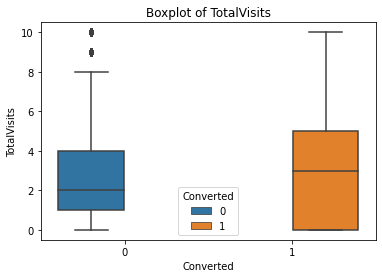

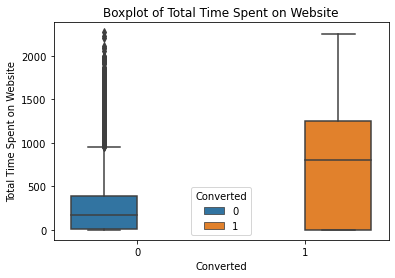

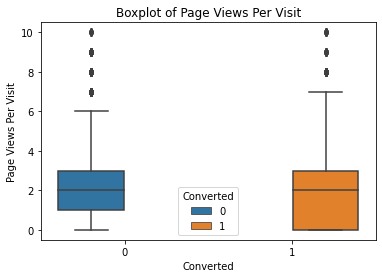

In [346]:
for i in data.select_dtypes(exclude='object').columns[1:]:
    sns.boxplot(x=data['Converted'],y=data[i],hue=data['Converted'])
    plt.title("Boxplot of"+" "+i)
    plt.show()
# Where 0 represents 'Not Converted Lead'
#       1 represents 'Converted Lead'

From the above boxplots median values, we can deduce that:
-  The 'Converted Leads' (represented by 1) spent more time on the website.
-  The 'Converted Leads' (represented by 1) made more visits to the page when compared to 'Non Converted Leads' (represented by 0).

### Univariate Analysis: (Categorical Variables)

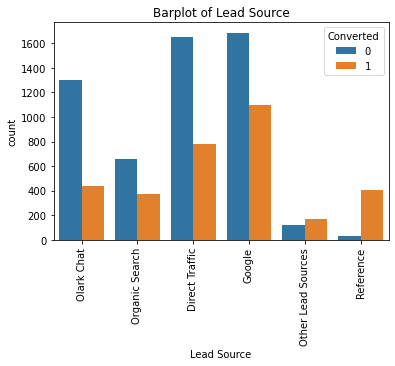

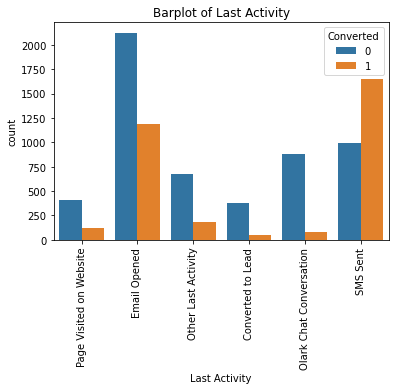

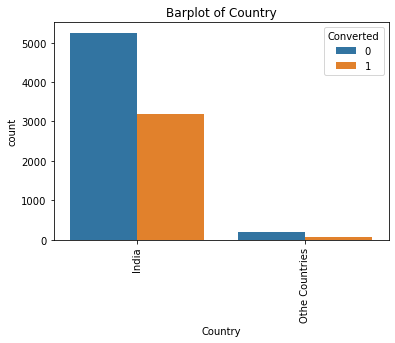

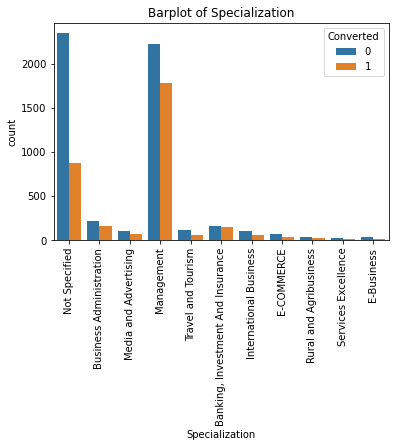

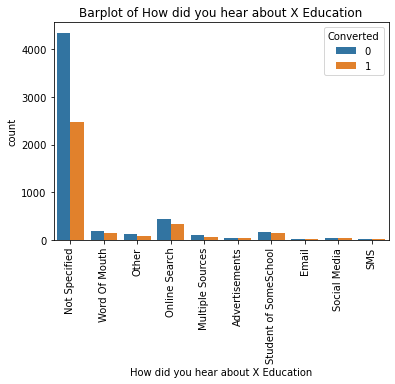

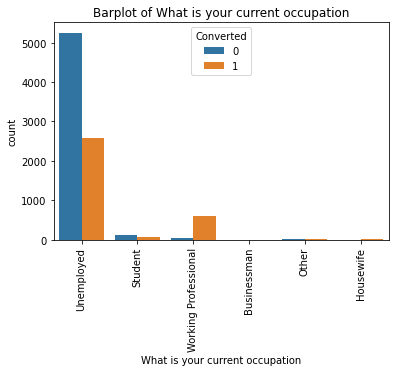

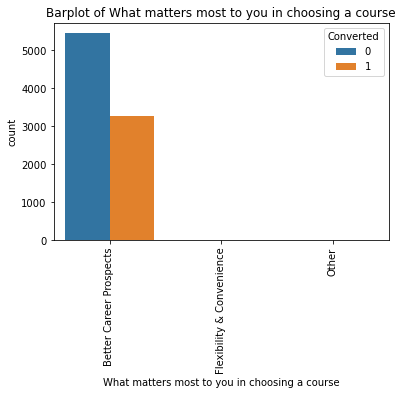

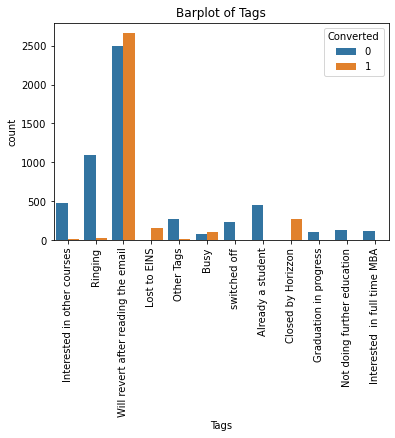

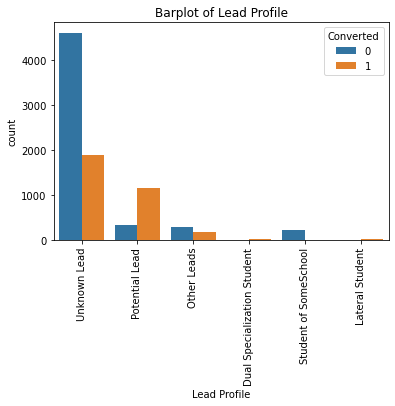

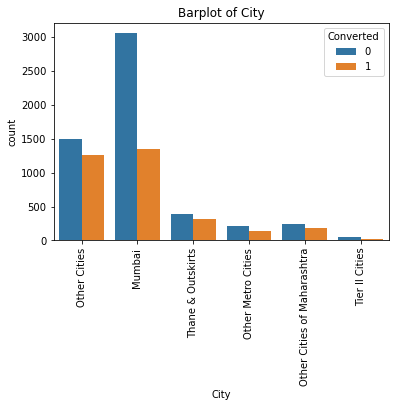

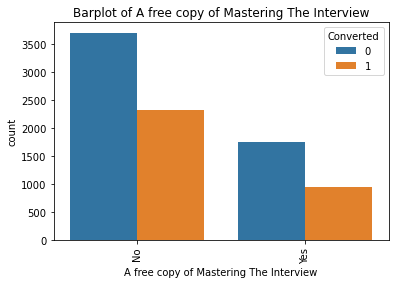

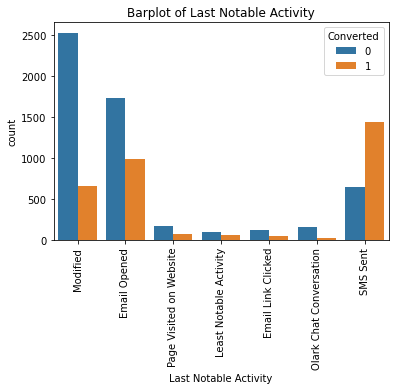

In [357]:
for i in data.select_dtypes(include='object').columns[1:]:
    ax=sns.countplot(data[i],hue=data['Converted'])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.title("Barplot of"+" "+i)
    plt.show()
# Where 0 represents 'Not Converted Lead'
#       1 represents 'Converted Lead'

From the above plots we can deduce the following:
1) The number one source of Leads irrespective of Converted or Not Converted seems to be 'Google' and next to that is 'Direct Traffic' (i.e., Direct visit to websites)<br>
One other important point to observe here, there is high conversion rate of Leads who made through 'Referrence'. <br>Even though it is small percentage of total leads, focussing on this 'Referrence' source could be a better option.<br> Such as providing discounts to the referring persons and the referred persons.<br>
2) The customers with last activity as 'SMS Sent' has higher conversion rate of turning Leads in to 'Converted'.<br>
3) India is the major source of customers for the company.<br>
4) The people who belong to 'Management Specialization' has high chance of purchasing the course. <br>The number of leads who are converted are more in the 'Management Specialization' category.<br> Next to them are 'Not Specified' Category even though the conversion of leads are low.<br>
5) Majority of the leads have not specified their source.<br>
6) The Leads with Tag 'Will Revert after reading the mail' has high conversion rate compared to leads with remaining tags.<br>
7) The leads which are assigned 'Potential Lead' has higher conversion rate to become a customer than other lead categories.<br>
It is suggestible to focus on 'Potential Lead' Category.<br>
8) The majority of leads who are converted belong to 'Mumbai' and 'Other Cities' category. <br>This provides a good opportunity to extend the business by providing discounts or incentives to customers belonging to this category.<br>
9) The leads whose last notable activity as 'SMS Sent' has higher chance of becoming a customer.<br>

### Bivariate Analysis (Numeric-Numeric):

In [358]:
## corrleation between numerical variables:
data[data.select_dtypes(exclude='object').columns].corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.038263,0.351060,-0.000214
TotalVisits,0.038263,1.000000,0.374162,0.801409
Total Time Spent on Website,0.351060,0.374162,1.000000,0.350359
Page Views Per Visit,-0.000214,0.801409,0.350359,1.000000


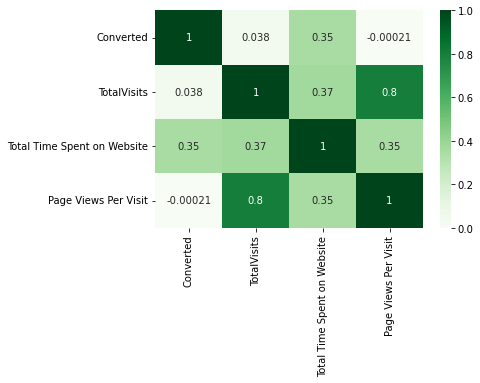

In [361]:
sns.heatmap(data[data.select_dtypes(exclude='object').columns].corr(),cmap='Greens',annot=True)
plt.show()

-  From the above heatmap, we can see a good positive correlation of 0.8 exists between 'Total Visits' and 'Page Views Per Visit'.

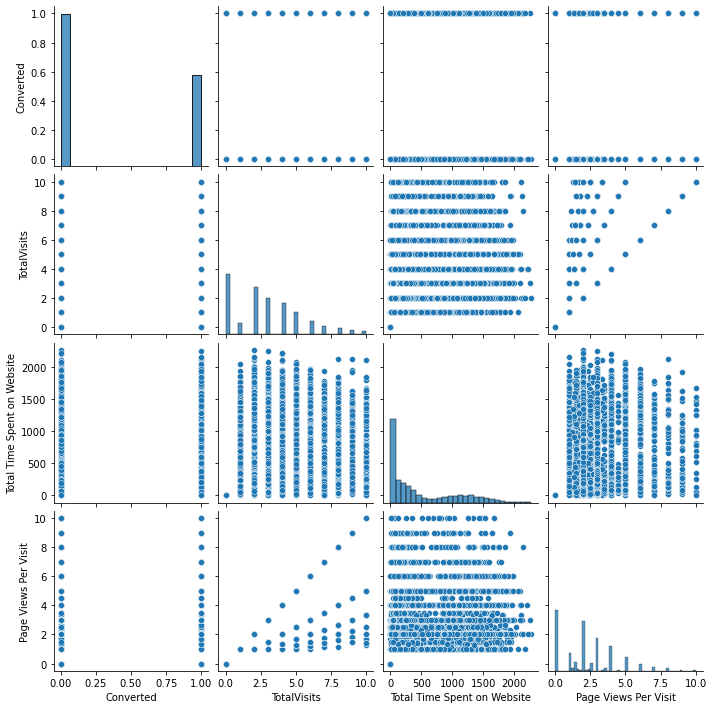

In [365]:
sns.pairplot(data[data.select_dtypes(exclude='object').columns])
plt.show()

### Preparing Data for Modelling:

#### Creating Dummy Variables for Categorical variables:

In [382]:
cat_cols=data.select_dtypes(include='object').columns
dummy_data=pd.get_dummies(data[cat_cols],drop_first=True)
## Concatenating dummy data frame with numeric values of original data frame
data1=pd.concat([data[data.select_dtypes(exclude='object').columns],dummy_data],axis=1)
data1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Least Notable Activity,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


### Train - Test Split Data:

In [383]:
# Target variable for the model 'y'
y=data1.pop('Converted')
# Assigning Independent variables to 'X'
X=data1
#splitting data in to Train data and Test data in the ratio 70:30
Xd1_train,Xd1_test,yd1_train,yd1_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [384]:
data1.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other Lead Sources', 'Lead Source_Reference',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Last Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Country_Othe Countries', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_International Business', 'Specialization_Management',
       'Specialization_Media and Advertising', 'Specialization_Not Specified',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'How did you hear about X E

In [385]:
# Checking shape of Train Test data of Independent variables
print(Xd1_train.shape)
print(Xd1_test.shape)

(6104, 71)
(2617, 71)


In [386]:
# Checking shape of Train and Test data of dependent/ targent variable
print(yd1_train.shape)
print(yd1_test.shape)

(6104,)
(2617,)


#### Scaling of Data:

-  Even there are little to no outliers present in the numerical columns, we can see utmost 10 outliers presence in some numerical categories when they are split under 'Converted' and 'Not Converted' category.
-  Thus we use StandardScaler to scale those numeric columns.

In [393]:
num_cols1=data1.columns[0:3]
scaler=StandardScaler()
Xd1_train[num_cols1]=scaler.fit_transform(Xd1_train[num_cols1])
Xd1_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Least Notable Activity,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6.104000e+03,6.104000e+03,6.104000e+03,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,...,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000
mean,4.117865e-17,-2.755550e-17,2.717355e-17,0.530799,0.065367,0.002294,0.319790,0.201180,0.120577,0.032765,...,0.041940,0.081750,0.007536,0.304718,0.307176,0.018021,0.364024,0.021298,0.029161,0.241317
std,1.000082e+00,1.000082e+00,1.000082e+00,0.499091,0.247193,0.047840,0.466433,0.400915,0.325661,0.178037,...,0.200468,0.274005,0.086490,0.460326,0.461361,0.133038,0.481195,0.144386,0.168272,0.427917
min,-1.181247e+00,-8.739535e-01,-1.177843e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.770801e-01,-8.707284e-01,-6.567251e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.125271e-02,-4.390230e-01,-1.356069e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.354191e-01,7.938943e-01,3.855114e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.860418e+00,3.313174e+00,4.033339e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building the Logistic Regression Model using RFE:

In [396]:
logm1=sm.GLM(yd1_train,(sm.add_constant(Xd1_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6032
Model Family:                Binomial   Df Model:                           71
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1291.8
Date:                Tue, 24 Jan 2023   Deviance:                       2583.6
Time:                        15:54:02   Pearson chi2:                 3.01e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5937
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      15.2127   5.41e+04      0.000      1.000   -1.06e+05    1.06e+05
TotalVisits                                                                 0.2915      0.092      3.172      0.002       0.111       0.472
Total Time Spent on Website                                                 1.1482      0.062     18.483      0.000       1.026       1.270
Page Views Per Visit                                                       -0.1615      0.093     -1.744      0.081      -0.343       0.020
Lead Origin_Landing Page Submission                                        -0.3604      0.242     -1.492      0.136      -0.834       0.113
Lead Origin_Lead Add Form                                                   3.3333      0.735      4.536      0.000       1.893       4.773
Lead Origin_Lead Import                                                     1.1935      1.187      1.006      0.315      -1.132       3.519
Lead Source_Google                                                          0.0460      0.194      0.237      0.812      -0.334       0.426
Lead Source_Olark Chat                                                      0.9943      0.254      3.914      0.000       0.496       1.492
Lead Source_Organic Search                                                 -0.1904      0.203     -0.936      0.349      -0.589       0.208
Lead Source_Other Lead Sources                                              0.3912      0.418      0.936      0.349      -0.428       1.210
Lead Source_Reference                                                      -1.3834      0.831     -1.666      0.096      -3.011       0.244
Last Activity_Email Opened                                                  0.1635      0.363      0.451      0.652      -0.547       0.874
Last Activity_Olark Chat Conversation                                      -0.4715      0.379     -1.245      0.213      -1.214       0.271
Last Activity_Other Last Activity                                          -0.3576      0.392     -0.913      0.361      -1.125       0.410
Last Activity_Page Visited on Website                                      -0.1749      0.448     -0.391      0.696      -1.053       0.703
Last Activity_SMS Sent                                                      0.9141      0.338      2.706      0.007       0.252       1.576
Country_Othe Countries                                                     -0.3617      0.308     -1.176      0.240      -0.964       0.241
Specialization_Business Administration                                      0.1320      0.378      0.349      0.727      -0.609       0.873
Spe

#### Feature selection using RFE:

In [400]:
logreg=LogisticRegression()
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(Xd1_train,yd1_train)
list(zip(Xd1_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 40),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 41),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Source_Google', False, 51),
 ('Lead Source_Olark Chat', False, 12),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Other Lead Sources', False, 11),
 ('Lead Source_Reference', False, 31),
 ('Last Activity_Email Opened', False, 16),
 ('Last Activity_Olark Chat Conversation', False, 24),
 ('Last Activity_Other Last Activity', False, 36),
 ('Last Activity_Page Visited on Website', False, 45),
 ('Last Activity_SMS Sent', False, 6),
 ('Country_Othe Countries', False, 25),
 ('Specialization_Business Administration', False, 56),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 44),
 ('Specialization_International Business', False, 23),
 ('Specialization_Management', False, 43),
 ('Specialization_Media

In [401]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True])

In [407]:
# Columns selected by RFE
col=Xd1_train.columns[rfe.support_]
Xd1_train.columns[~rfe.support_]
col

Index(['Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Profile_Student of SomeSchool', 'Lead Profile_Unknown Lead',
       'City_Other Cities', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [408]:
# Creating a VIF (Variance Inflation Factor) Dataframe function
def vif_f(col):
    bd1=Xd1_train[col]
    vif=pd.DataFrame()
    vif['features'] = bd1.columns
    vif['vif']=[variance_inflation_factor(bd1.values,i) for i in range(bd1.shape[1])]
    vif['vif']=round(vif['vif'],2)
    return vif.sort_values(by='vif',ascending=False)

In [410]:
#Creating Logistic Regression model function
def LogReg_model(col):
    Xd1_train_sm=sm.add_constant(Xd1_train[col])
    logm=sm.GLM(yd1_train,Xd1_train_sm,family=sm.families.Binomial())
    logm_model=logm.fit()
    return logm_model.summary()

#### Logistic Regression Model 1:

In [412]:
# Inputting the columns selected by RFE in to regression model and vif functions:
print(LogReg_model(col))
print(vif_f(col))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6088
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1629.5
Date:                Tue, 24 Jan 2023   Deviance:                       3259.1
Time:                        16:20:39   Pearson chi2:                 2.92e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5462
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

-  From above table, we can infer that p-values of 'Tags_Not doing further education', 'Tags_Interested in other courses', <br>
'Tags_Interested in full time MBA' are greater than siginificance level 0.05, thus suggesting them as insignificant.
-  As Per VIF table, none of the features seem to have multi collinearity.

#### Logistic Regression Model 2:

In [413]:
# Lets drop the 'Tags_Not doing further education' and see the model
col1=col.drop('Tags_Not doing further education')
print(LogReg_model(col1))
print(vif_f(col1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6089
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1633.1
Date:                Tue, 24 Jan 2023   Deviance:                       3266.1
Time:                        16:23:46   Pearson chi2:                 2.94e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5456
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Logistic Regression Model 3:

-  Lets drop the column 'Tags_Interested in other courses' as it has high p-value of 0.3

In [415]:
col2=col1.drop('Tags_Interested in other courses')
print(LogReg_model(col2))
print(vif_f(col2))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6090
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1633.6
Date:                Tue, 24 Jan 2023   Deviance:                       3267.3
Time:                        16:26:47   Pearson chi2:                 2.88e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5456
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Logistic Regression Model 4:

-  Since VIF of all the features are < 5, we have to filter the columns based on p-value.
-  Lets drop the column 'Tags_Interested  in full time MBA' as it has p-value 0.19 > 0.05

In [416]:
col3=col2.drop('Tags_Interested  in full time MBA')
print(LogReg_model(col3))
print(vif_f(col3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6091
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1634.8
Date:                Tue, 24 Jan 2023   Deviance:                       3269.6
Time:                        16:29:18   Pearson chi2:                 2.89e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5454
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Logistic Regression Model 5:

-  Drop the column 'Tags_Ringing' as it has p-value of 0.277 > 0.05

In [417]:
col4=col3.drop('Tags_Ringing')
print(LogReg_model(col4))
print(vif_f(col4))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6092
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1635.4
Date:                Tue, 24 Jan 2023   Deviance:                       3270.8
Time:                        16:31:47   Pearson chi2:                 2.65e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5453
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Logistic Regression Model 6:

-  Now, drop the column 'Tags_switched off' as it has p-value of 0.167 > 0.05 

In [418]:
col5=col4.drop('Tags_switched off')
print(LogReg_model(col5))
print(vif_f(col5))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6093
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1636.6
Date:                Tue, 24 Jan 2023   Deviance:                       3273.2
Time:                        16:33:39   Pearson chi2:                 2.70e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5451
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

-  Now, we can see that all the variables of logistic regression model seems to be significant i.e., p-value < 0.05.
-  VIF of all the features are < 5 which suggests there is little to no collinearity among the features.
-  Thus, we can take the above model as final model.

#### Final Model:

In [420]:
Xd1_train_sm=sm.add_constant(Xd1_train[col5])
flogm=sm.GLM(yd1_train,Xd1_train_sm,family=sm.families.Binomial())
res=flogm.fit()

#### Creating a dataframe with actual 'Converted' flag and predicted probabiities:

In [434]:
yd1_train_pred=res.predict(Xd1_train_sm).values.reshape(-1)
yd1_train_pred_final=pd.DataFrame({'converted':yd1_train.values,'converted_prob':yd1_train_pred})
yd1_train_pred_final['converted_ID']=yd1_train.index
yd1_train_pred_final.head()

,converted,converted_prob,converted_ID
0,1,0.422318,7204
1,0,0.000637,3994
2,1,0.422318,3961
3,1,0.790137,4867
4,0,0.165330,8682


#### Creating a new colum 'Predicted' with 1 if Converted Probability > 0.5 else as 0:

In [435]:
yd1_train_pred_final['predicted']=yd1_train_pred_final.converted_prob.map(lambda x:1 if x>0.5 else 0)

In [436]:
yd1_train_pred_final.head()

,converted,converted_prob,converted_ID,predicted
0,1,0.422318,7204,0
1,0,0.000637,3994,0
2,1,0.422318,3961,0
3,1,0.790137,4867,1
4,0,0.165330,8682,0


#### Creating Confusion Matrix:

In [437]:
confusion=metrics.confusion_matrix(yd1_train_pred_final.converted,yd1_train_pred_final.predicted)
print(confusion)

[[3663  147]
 [ 433 1861]]


#### Calculation of Sensitivity, Specificity, False Positive Rate, Precision (Positive Predictive Value), Negative Predictive Value of Final Logistic Regression Model:

In [441]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [442]:
#Sensitivity:
print('Sensitivty:',(TP/(TP+FN)*100))

Sensitivty: 81.12467306015692


In [443]:
#Specificity:
print('Specificity:',(TN/(TN+FP)*100))

Specificity: 96.14173228346456


In [446]:
#Precision:
print('Precision:',(TP/(TP+FP)*100))

Precision: 92.67928286852589


In [447]:
#Negative Predictive Value:
print("Negative Predictive Value:",(TN/(TN+FN)*100))

Negative Predictive Value: 89.4287109375


-  From the above values, we can see both sensitivity and specificity both are at acceptable levels for chosen cut off probability as 0.5.

#### Accuracy of prediction Model:

In [439]:
print(metrics.accuracy_score(yd1_train_pred_final.converted,yd1_train_pred_final.predicted))

0.9049803407601573


### ROC Curve:

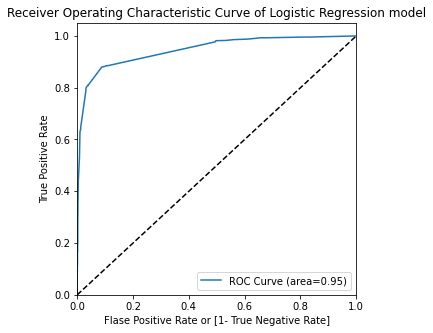

In [450]:
def draw_roc(actual, probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr, label='ROC Curve (area=%0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('Flase Positive Rate or [1- True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve of Logistic Regression model')
    plt.legend(loc='lower right')
    plt.show()
    return None
draw_roc(yd1_train_pred_final.converted,yd1_train_pred_final.converted_prob)

-  A Good model will have maximum area under ROC Curve and will be above dotted Referrence line.
-  In our models case, Area under ROC Curve is coming as 0.95, suggesting it as a good model.

#### Finding Optimal Probability Cutoff or Threshold Limit:

In [451]:
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    yd1_train_pred_final[i]=yd1_train_pred_final.converted_prob.map(lambda x:1 if x>i else 0)
yd1_train_pred_final.head()

,converted,converted_prob,converted_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.422318,7204,0,1,1,1,1,1,0,0,0,0,0
1,0,0.000637,3994,0,1,0,0,0,0,0,0,0,0,0
2,1,0.422318,3961,0,1,1,1,1,1,0,0,0,0,0
3,1,0.790137,4867,1,1,1,1,1,1,1,1,1,0,0
4,0,0.165330,8682,0,1,1,0,0,0,0,0,0,0,0


#### Calculation of Accuracy, Sensitivity, Specificity for various probability cutoff points:

In [453]:
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])
num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1=metrics.confusion_matrix(yd1_train_pred_final.converted,yd1_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    specificity=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i]=[i,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.375819     1.000000     0.000000
0.1   0.1  0.682831     0.976896     0.505774
0.2   0.2  0.888925     0.884917     0.891339
0.3   0.3  0.899902     0.879250     0.912336
0.4   0.4  0.900066     0.879250     0.912598
0.5   0.5  0.904980     0.811247     0.961417
0.6   0.6  0.904980     0.806888     0.964042
0.7   0.7  0.905144     0.800785     0.967979
0.8   0.8  0.860256     0.649085     0.987402
0.9   0.9  0.817169     0.526591     0.992126


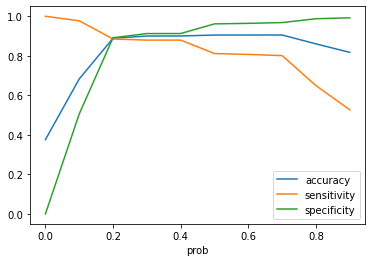

In [454]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensitivity','specificity'])
plt.show()

-  From the above plot, we can see that the optimal cut off value or optimal probability threshold value for acheiving a balance between 'accuracy', 'sensitivity', 'specificity' is 0.2.

In [455]:
# Predicted values with optimal cutoff point as 0.2
yd1_train_pred_final['optimal_predicted']=yd1_train_pred_final.converted_prob.map(lambda x:1 if x>0.2 else 0)
yd1_train_pred_final.head()

,converted,converted_prob,converted_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,optimal_predicted
0,1,0.422318,7204,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.000637,3994,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.422318,3961,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.790137,4867,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.165330,8682,0,1,1,0,0,0,0,0,0,0,0,0


In [456]:
confusion2=metrics.confusion_matrix(yd1_train_pred_final.converted,yd1_train_pred_final.optimal_predicted)
print(confusion2)

[[3396  414]
 [ 264 2030]]


In [457]:
TP=confusion2[1,1]
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]

In [458]:
print('Sensitivity:',(TP/(TP+FN)*100))

Sensitivity: 88.4917175239756


In [459]:
print('Specificity:',(TN/(TN+FP)*100))

Specificity: 89.13385826771653


In [460]:
print('False Positive Rate:',(FP/(TN+FP)*100))

False Positive Rate: 10.866141732283465


In [466]:
#Precision:
print('Precision:',(TP/(TP+FP)*100))

Precision: 83.06055646481178


In [462]:
print('Negative Predictive Value:',(TN/(TN+FN)*100))

Negative Predictive Value: 92.78688524590164


In [468]:
print('Accuracy of Model is:', metrics.accuracy_score(yd1_train_pred_final.converted,yd1_train_pred_final.optimal_predicted)*100)

Accuracy of Model is: 88.89252948885976


-  From the above parameters, we can see that our model is good at sensitivty, specificity and other parameters.

#### Precision and Recall:

In [474]:
print('The Precision score is:',precision_score(yd1_train_pred_final.converted,yd1_train_pred_final.optimal_predicted)*100)

The Precision score is: 83.06055646481178


In [475]:
print('The Recall score is:',recall_score(yd1_train_pred_final.converted,yd1_train_pred_final.optimal_predicted)*100)

The Recall score is: 88.4917175239756


#### Precision vs Recall Curve:

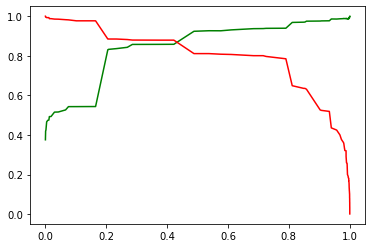

In [478]:
p,r,thresholds=precision_recall_curve(yd1_train_pred_final.converted,yd1_train_pred_final.converted_prob)
plt.plot(thresholds,p[:-1],'g-')
plt.plot(thresholds,r[:-1],'r-')
plt.show()

-  From the above plot, we can see that at value of approximately 0.5 there is a balance between Precision (Green) and Recall (Red)

### Making Predictions on Test Data Set:

In [483]:
# Scaling Test Data Set
# There is no need to fit the test data set. We just have to Transform the test data set.
Xd1_test[num_cols1]=scaler.transform(Xd1_test[num_cols1])
Xd1_test=Xd1_test[col5]
Xd1_test.head()

,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Lead Profile_Student of SomeSchool,Lead Profile_Unknown Lead,City_Other Cities,Last Notable Activity_SMS Sent
670,0,0,0,0,0,1,0,1,0,0
6472,0,0,0,0,0,1,0,1,0,0
8985,0,0,0,0,0,1,0,0,1,0
2625,0,0,0,0,0,0,0,0,0,0
8960,0,0,0,0,0,1,0,0,0,0


In [484]:
Xd1_test_sm=sm.add_constant(Xd1_test)
yd1_test_pred=res.predict(Xd1_test_sm)
yd1_test_pred[:10]

670     0.165330
6472    0.165330
8985    0.957024
2625    0.019034
8960    0.857828
1551    0.000637
5048    0.165330
1726    0.019034
7945    0.940237
7891    0.422318
dtype: float64

In [494]:
yd1_pred_1=pd.DataFrame(yd1_test_pred)
yd1_test_df=pd.DataFrame(yd1_test)
yd1_test_df['converted_ID']=yd1_test_df.index
yd1_pred_1.reset_index(drop=True,inplace=True)
yd1_test_df.reset_index(drop=True,inplace=True)
yd1_pred_final=pd.concat([yd1_test_df,yd1_pred_1],axis=1)
yd1_pred_final.head()

,Converted,converted_ID,0
0,0,670,0.165330
1,1,6472,0.165330
2,1,8985,0.957024
3,0,2625,0.019034
4,0,8960,0.857828


In [498]:
yd1_pred_final=yd1_pred_final.rename(columns={0:'converted_prob'})
yd1_pred_final['final_predicted']=yd1_pred_final.converted_prob.map(lambda x:1 if x>0.2 else 0)
yd1_pred_final.head()
print("The accuracy score of our model on the Test Dataset is:",'\n',metrics.accuracy_score(yd1_pred_final.Converted,yd1_pred_final.final_predicted))

The accuracy score of our model on the Test Dataset is: 
 0.8949178448605273


In [501]:
confusion3=metrics.confusion_matrix(yd1_pred_final.Converted,yd1_pred_final.final_predicted)
TP3=confusion3[1,1]
TN3=confusion3[0,0]
FP3=confusion3[0,1]
FN3=confusion3[1,0]

In [502]:
#Sensitivity:
print('The Sensitivity of our model on the test data set is:',(TP3/(TP3+FN3)*100))

The Sensitivity of our model on the test data set is: 89.34426229508196


In [503]:
#Specificity:
print('The Specificity of our model on the test data set is:',(TN3/(TN3+FP3)*100))

The Specificity of our model on the test data set is: 89.57952468007313


In [504]:
#Precision:
print('The Precision of our model on the test data set is:',(TP3/(TP3+FN3)*100))

The Precision of our model on the test data set is: 89.34426229508196


In [505]:
#Negative Predictive Value:
print('The Negative Predictive Value of our model on the test data set is:',(TN3/(TN3+FN3)*100))

The Negative Predictive Value of our model on the test data set is: 93.39263024142312


-  From the above values, we can say that our model works good on the test data set too.
-  Hence our Model can be used as a decision making tool to increase the conversion rate of leads.

### Conclusions Based On Final Model:

In [507]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6093
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1636.6
Date:                Tue, 24 Jan 2023   Deviance:                       3273.2
Time:                        19:00:33   Pearson chi2:                 2.70e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5451
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9423      0.188    -20.992      0.000      -4.310      -3.574
Lead Origin_Lead Add Form                                1.7700      0.300      5.894      0.000       1.181       2.359
What is your current occupation_Working Professional     2.5900      0.287      9.031      0.000       2.028       3.152
Tags_Busy                                                4.8650      0.300     16.222      0.000       4.277       5.453
Tags_Closed by Horizzon                                 10.1145      0.756     13.383      0.000       8.633      11.596
Tags_Lost to EINS                                       10.7529      0.752     14.305      0.000       9.280      12.226
Tags_Will revert after reading the email                 5.7397      0.211     27.234      0.000       5.327       6.153
Lead Profile_Student of SomeSchool                      -2.7115      1.045     -2.595      0.009      -4.759      -0.664
Lead Profile_Unknown Lead                               -3.4165      0.156    -21.930      0.000      -3.722      -3.111
City_Other Cities                                        1.3058      0.106     12.341      0.000       1.098       1.513
Last Notable Activity_SMS Sent                           2.9448      0.115     25.583      0.000       2.719       3.170
========================================================================================================================
"""

From the above summary, we can suggest the following changes to the company to increase their lead conversion and identify hot leads.
1) There is a positive correlation between 'Lead Add Form' and 'Converted' as evident by the positive coefficient 1.77.<br>
It suggests that, A person who fills the form can be considered a hot lead and we can persuade that person to increase the conversion of leads.<br>
2) A positive coefficient (of 2.59) between 'Working Professional' and 'Converted' suggests that working professionals should be given due importance during the persuasion by sales team, as they have high chance of becoming hot leads and there by increase in conversion.<br>
3) High positive coefficeint > 10 is observed in two variables 'Tags_closed by Horizzon' and 'Tags_Lost to EINS'. Focussing on these tags would increase the conversion from not converted to converted.<br>
4) A negative coefficient of -2.711 and -3.41 for 'School Student' and 'Unknown Lead' respectively suggests that sales team should steer away from these customers during there calls.<br>
5) The customers whose last notable activity is 'SMS Sent' should be the focus of the sales team, as they have higher chance of becoming 'hot leads' thereby increase in the conversion numbers.<br>
6) The customers belonging to 'Other Citites' should also be the focus of sales team to make calls.